In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
tesla = pd.read_csv('dataset\datasets.csv')

In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2518 non-null   object
 1   Close/Last  2518 non-null   object
 2   Volume      2518 non-null   int64 
 3   Open        2518 non-null   object
 4   High        2518 non-null   object
 5   Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla['Close/Last'] = tesla['Close/Last'].str.slice(1).astype(float)
tesla['Open'] = tesla['Open'].str.slice(1).astype(float)
tesla['High'] = tesla['High'].str.slice(1).astype(float)
tesla['Low'] = tesla['Low'].str.slice(1).astype(float)

In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2518 non-null   datetime64[ns]
 1   Close/Last  2518 non-null   float64       
 2   Volume      2518 non-null   int64         
 3   Open        2518 non-null   float64       
 4   High        2518 non-null   float64       
 5   Low         2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB


In [7]:
print(f'Dataframe contains stocks prices between {tesla.Date.min()} and {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stocks prices between 2013-09-23 00:00:00 and 2023-09-22 00:00:00
Total Days = 3651 days


In [8]:
tesla.describe()

,Date,Close/Last,Volume,Open,High,Low
count,2518,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,2018-09-21 21:07:51.803018240,87.853117,1.145689e+08,87.884219,89.888331,85.770134
min,2013-09-23 00:00:00,8.033300,1.065415e+07,7.958700,8.181300,7.740000
25%,2016-03-23 06:00:00,15.362500,6.630195e+07,15.368675,15.639425,15.126500
50%,2018-09-20 12:00:00,21.064350,9.307683e+07,21.046000,21.384650,20.665700
75%,2021-03-23 18:00:00,183.257500,1.351489e+08,183.800825,186.485000,179.807500
max,2023-09-22 00:00:00,409.970000,9.140809e+08,411.470000,414.496600,405.666600
std,NaN,106.533986,7.718402e+07,106.637412,109.127629,103.958303


<Axes: >

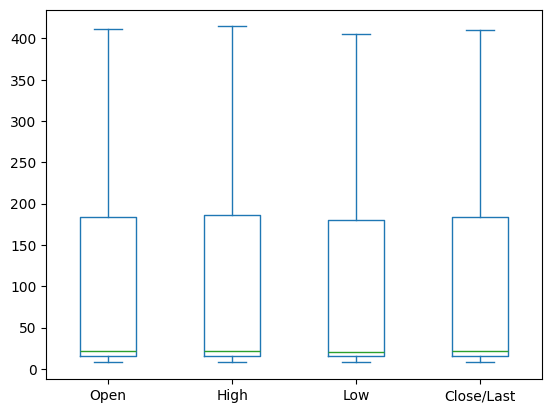

In [9]:
tesla[['Open', 'High','Low','Close/Last']].plot(kind='box')

In [10]:
#setting layout for our plot
layout = go.Layout(
    title = 'Stock Prices of Tesla',
    xaxis=dict(
        title = 'Date',
        titlefont = dict(
            family='Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis=dict(
        title = 'Price',
        titlefont = dict(
            family='Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
)

tesla_data = [{'x': tesla['Date'], 'y':tesla['Close/Last']}]
plot = go.Figure(data=tesla_data, layout=layout)

c:\Users\satwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [11]:
iplot(plot)

## Building Linear Regression Model

In [12]:
from sklearn.model_selection import train_test_split

#for preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [13]:
#splitting into test data and train data
X = np.array(tesla.index).reshape(-1, 1)
Y = tesla['Close/Last']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
#feature Scaling
scaler = StandardScaler().fit(X_train)

In [15]:
# creating Linear Model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode='markers',
    name='Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [19]:
iplot(plot2)

In [23]:
#calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6258699099298799	0.628724556493995
MSE       4347.121145991386	3973.9082336200972

